# данные

сегодня мы посчитаем метрики на более-менее классическом для тренировки датасете Online Retail Data Set 

что я уже сделала с оригинальным датасетом:

* очистила от missing values
* убрала страну United Kingdom, потому что ее больше всего в данных

для тренировки вы можете проделать все это сами с оригинальными данными, скачать их можно отсюда [kaggle](https://www.kaggle.com/vijayuv/onlineretail) или [uci machine learning repository](http://archive.ics.uci.edu/ml/datasets/online+retail) (здесь есть описание переменных) , они одинаковые

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/online_retail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583,France


* **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description**: Product (item) name. Nominal.
* **Quantity**: The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country**: Country name. Nominal, the name of the country where each customer resides.

## немного заданий на повторение 
прежде чем мы перейдем к самим метрикам

**№1** сколько наблюдений в датасете?

In [ ]:
data.shape[0]

44951

**№2** посмотрите информацию о переменных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44951 entries, 0 to 44950
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    44951 non-null  object 
 1   StockCode    44951 non-null  object 
 2   Description  44951 non-null  object 
 3   Quantity     44951 non-null  int64  
 4   InvoiceDate  44951 non-null  object 
 5   UnitPrice    44951 non-null  float64
 6   CustomerID   44951 non-null  int64  
 7   Country      44951 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.7+ MB


**№2** нарисуйте график, который отражает количество стран в датасете

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'number of observations')

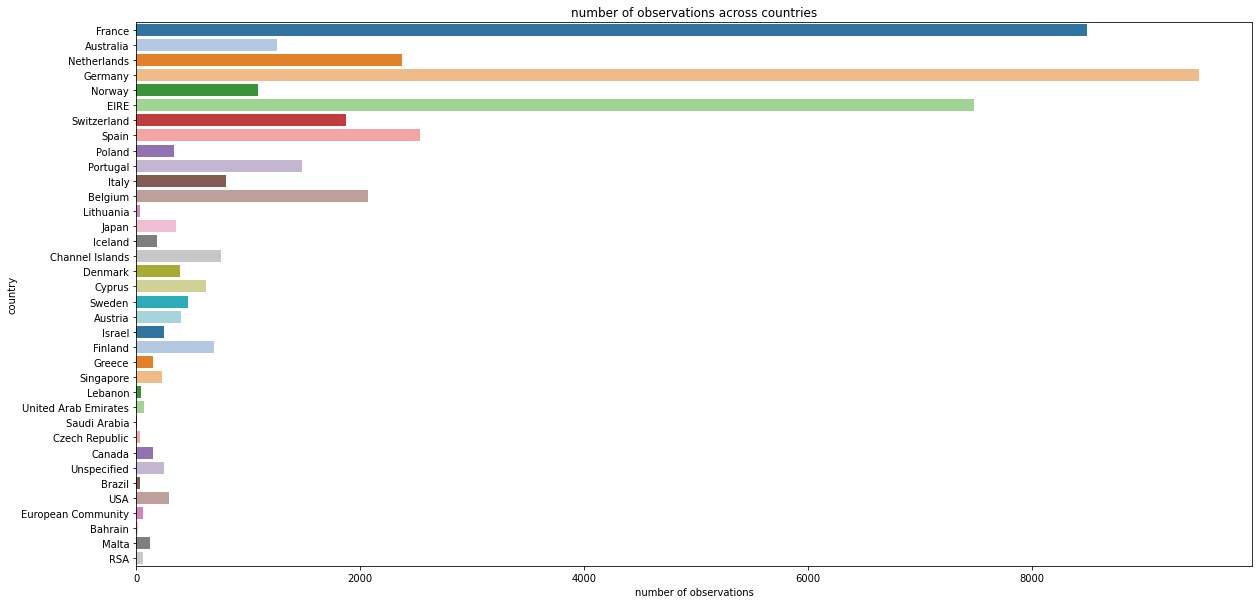

In [ ]:
plt.figure(figsize=(20, 10))
cntr = sns.countplot(y="Country", data = data, order = data["Country"].value_counts().index, palette="tab20")
cntr.set_title('number of observations across countries')
cntr.set_ylabel('country')
cntr.set_xlabel('number of observations')

**№3** нарисуйте график, который отражает количество описаний

**№3 со звездочкой**: попробуйте вывести топ-10 значений

2897 unique descriptions
AxesSubplot(0.125,0.125;0.775x0.755)


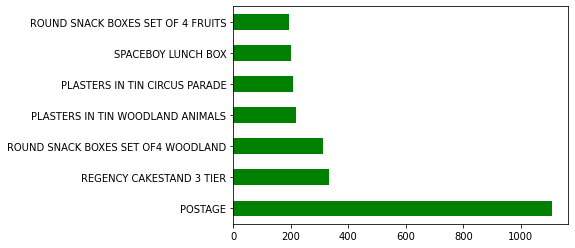

In [ ]:
print(data["Description"].nunique(), "unique descriptions")
print(data["Description"].value_counts()[:7].plot(kind='barh', color = "green"))

**№4** вытащите из колонки `InvoiceDate` дату (убрав время), посчитайте сумму по `UnitPrice` (сколько в одни сутки было куплено) и запишите это в новую колонку. нарисуйте график, который показывает новую колонку и время покупки

In [ ]:
data['invoice_date'] = pd.to_datetime(data['InvoiceDate']).dt.date
#data['invoice_time'] = pd.to_datetime(data['InvoiceDate']).dt.time

In [ ]:
data["group_pricedate"] = data['UnitPrice'].groupby(data['invoice_date']).transform('sum')
#data["group_pricedate"] = data.groupby('invoice_date')['UnitPrice'].transform('sum')
data.tail(16)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_date,group_pricedate
44935,581578,22736,RIBBON REEL MAKING SNOWMEN,10,12/9/2011 12:16,1.65,12713,Germany,2011-12-09,512.78
44936,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680,France,2011-12-09,512.78
44937,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/2011 12:50,1.65,12680,France,2011-12-09,512.78
44938,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/2011 12:50,1.65,12680,France,2011-12-09,512.78
44939,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680,France,2011-12-09,512.78
44940,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680,France,2011-12-09,512.78
44941,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680,France,2011-12-09,512.78
44942,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680,France,2011-12-09,512.78
44943,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680,France,2011-12-09,512.78
44944,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680,France,2011-12-09,512.78


In [ ]:
#sns.lineplot(x="invoice_date", y="group_pricedate", data=data)
import plotly.express as px

fig = px.line(data, 
              x='invoice_date', 
              y="group_pricedate", 
              title="How many products were bought in time", 
              labels={"group_pricedate": "Money spend",  "invoice_date": "Days"})
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

# считаем рфм, строим кластеры

вспомним, что такое рфм?

https://vc.ru/s/productstar/143804-rfm-analiz-segmentiruem-klientov-dlya-optimizacii-reklamnoy-kampanii

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_date,group_pricedate,TotalSum
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France,2010-12-01,476.17,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583,France,2010-12-01,476.17,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583,France,2010-12-01,476.17,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583,France,2010-12-01,476.17,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583,France,2010-12-01,476.17,15.6


In [ ]:
# Create TotalSum colummn
data["TotalSum"] = data["Quantity"] * data["UnitPrice"]

In [ ]:
# Create date variable that records recency
import datetime
snapshot_date = max(data["invoice_date"]) + datetime.timedelta(days=1)

In [ ]:
# Aggregate data by each customer
customers = data.groupby(['CustomerID']).agg({
    'invoice_date': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

In [ ]:
# Rename columns
customers.rename(columns = {'invoice_date': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
customers.head(10)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347,3,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40
12352,37,95,1545.41
12353,205,4,89.00
12354,233,58,1079.40
12355,215,13,459.40
12356,23,59,2811.43


Customer 17844 has frequency: 107, monetary value: $51.56 and recency: 5 days

**как посмотреть на конкретного клиента, чтобы его охарактеризовать?**

In [ ]:
data[data["CustomerID"] == 12362]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_date,group_pricedate,TotalSum
6956,544203,21913,VINTAGE SEASIDE JIGSAW PUZZLES,4,2/17/2011 10:30,3.75,12362,Belgium,2011-02-17,443.75,15.0
6957,544203,22431,WATERING CAN BLUE ELEPHANT,6,2/17/2011 10:30,1.95,12362,Belgium,2011-02-17,443.75,11.7
6958,544203,22432,WATERING CAN PINK BUNNY,6,2/17/2011 10:30,1.95,12362,Belgium,2011-02-17,443.75,11.7
6959,544203,21746,SMALL RED RETROSPOT WINDMILL,12,2/17/2011 10:30,1.25,12362,Belgium,2011-02-17,443.75,15.0
6960,544203,21747,SMALL SKULL WINDMILL,12,2/17/2011 10:30,1.25,12362,Belgium,2011-02-17,443.75,15.0
...,...,...,...,...,...,...,...,...,...,...,...
44126,580979,22549,PICTURE DOMINOES,12,12/6/2011 15:40,1.45,12362,Belgium,2011-12-06,851.99,17.4
44127,580979,23569,TRADTIONAL ALPHABET STAMP SET,4,12/6/2011 15:40,4.95,12362,Belgium,2011-12-06,851.99,19.8
44128,580979,23598,PAPER BUNTING VINTAGE PARTY,6,12/6/2011 15:40,2.95,12362,Belgium,2011-12-06,851.99,17.7
44129,580979,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,12,12/6/2011 15:40,1.25,12362,Belgium,2011-12-06,851.99,15.0


Наш клиент купил очень мало продуктов за очень маленькую цену, что-то про выпечку и чай. 

In [ ]:
from scipy import stats
import numpy as np

customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
417,7.473674,5.046059,14.325762
418,8.909743,3.146556,7.289307
419,2.607337,4.520122,11.695998
420,9.056369,3.468491,9.616263
421,6.798565,1.624402,3.721954


In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2)) 

[ 0. -0.  0.]
[1. 1. 1.]


In [ ]:
customers_normalized

array([[-1.64088148,  1.10837403,  0.78620078],
       [ 0.31447666, -0.33862841,  0.14975809],
       [-0.64229995,  0.35787107,  0.13581503],
       ...,
       [-1.0804403 ,  0.45294489,  0.07828753],
       [ 1.47933637, -0.36515781, -0.24331447],
       [ 0.58315906, -1.79974212, -1.1547872 ]])

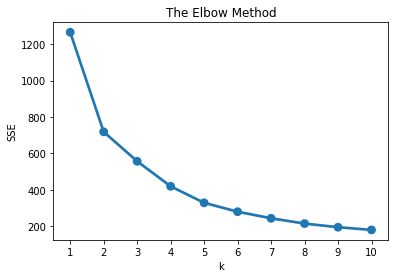

In [ ]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(customers_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        152.12     29.18        640.40   231
1         25.91    200.06       7247.44   191

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_

In [ ]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347,1,Recency,-1.640881
1,12348,0,Recency,0.314477
2,12349,1,Recency,-0.642300
3,12350,0,Recency,1.516505
4,12352,1,Recency,-0.207353


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



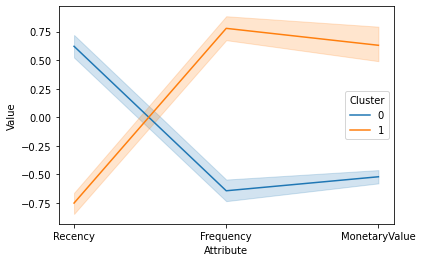

In [ ]:
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

# референсы

* суперский код взят отсюда: [кластеры](https://towardsdatascience.com/customer-segmentation-in-python-9c15acf6f945), [рфм](https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6), [больше про ретеншн](https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b)

* суперский [трек на датакемпе](https://learn.datacamp.com/skill-tracks/marketing-analytics-with-python?version=2), есть сегментация, а/б тесты в питоне, метрики и даже немного про сошиал медиа (твиттер)